In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
%matplotlib inline

from pathlib import Path
import numpy as np
import pandas as pd
import pandas_datareader.data as web

import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from sklearn.preprocessing import scale
import talib

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
def read_file(filename):
    return pd.read_csv(filename, index_col=0, parse_dates=True, infer_datetime_format=True)

def get_data(timeframe, name):
    return read_file("data_with_indicators/btcusdt_" + timeframe + "_" + name + ".csv")

In [23]:
df = get_data('5m', 'train')

In [24]:
df_ = df['close']
df_ = pd.DataFrame(df_)

In [25]:
df_['PLUS_DM'] = talib.PLUS_DM(df.high, df.low, timeperiod=10)
df_['MINUS_DM'] = talib.MINUS_DM(df.high, df.low, timeperiod=10)

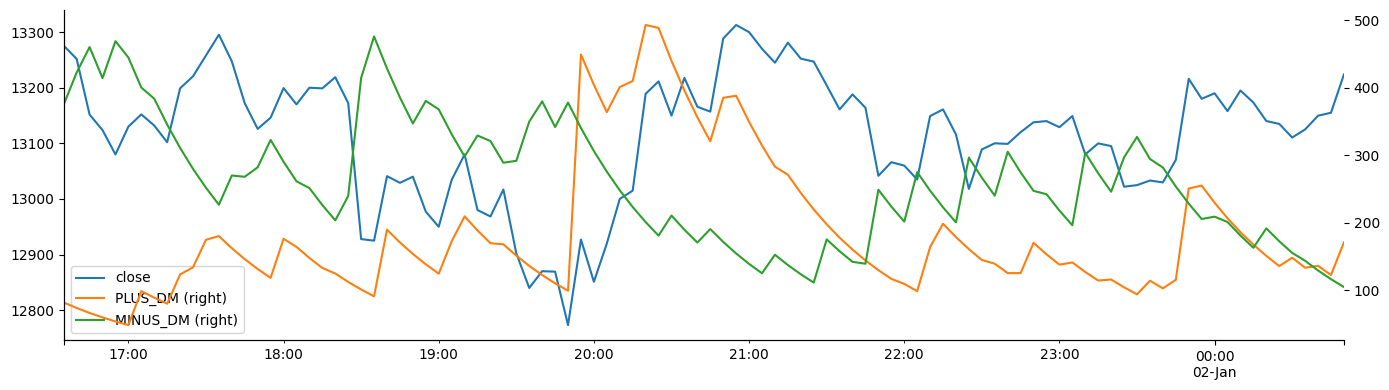

In [34]:
axes = df_.iloc[100:200][['close', 'PLUS_DM', 'MINUS_DM']].plot(figsize = (14,4), secondary_y = ['PLUS_DM', 'MINUS_DM'])
axes.set_xlabel('')
sns.despine()
plt.tight_layout()